### 기본 라이브러리 import 및 폰트 설정

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [12]:
order = pd.read_csv('data/log_order.csv')
member = pd.read_csv('data/master_member.csv')
product = pd.read_csv('data/master_product.csv')

### order 데이터 전처리

In [13]:
# 사은품 제거, 나중에 member 데이터와 merge
order.drop(index=order[order['상품명'].str.contains('사은품') == True].index, axis=0, inplace=True)

In [14]:
# 필요한 열만 추출
order_drop_columns = order.loc[:, ['주문자ID', '판매가']]
order_drop_columns.head(3)

,주문자ID,판매가
0,pp683,71450
1,asd0908,70620
2,NaN,13910


In [15]:
# ID별 구매금액 합
order_sum = order_drop_columns.groupby('주문자ID', as_index=False)['판매가'].sum()
pd.DataFrame(order_sum.value_counts()).sort_values(by='판매가')

# 판매 금액 적은 사람 제거 필요

,,0
주문자ID,판매가,
pp197,0,1
39706335@n,0,1
down9048,0,1
pp567,1320,1
pp773,3480,1
...,...,...
jsckorea12,14309730,1
pp257,14534220,1
leemansome,15331070,1


In [16]:
# ID별 구매횟수
order_count = order_drop_columns.groupby('주문자ID', as_index=False)['판매가'].count()
pd.DataFrame(order_count.value_counts()).sort_values(by='판매가')

# 구매횟수 적은 사람 제거 필요

,,0
주문자ID,판매가,
100304734@n,1,1
85444883@n,1,1
8545991@n,1,1
796104071@k,1,1
7984963@n,1,1
...,...,...
pp257,179,1
leemansome,187,1
jsckorea12,189,1


In [17]:
# ID별 구매금액 합계, 구매횟수 merge
order_preprocessed = order_sum.merge(right = order_count, left_on='주문자ID', right_on='주문자ID')
order_preprocessed.head()

,주문자ID,판매가_x,판매가_y
0,100304734@n,103300,1
1,1003409866@k,3113540,45
2,100381931@n,41730,3
3,1004498382@k,76400,1
4,1004547839@k,180400,2


In [18]:
# column 명 변경
order_preprocessed.columns = ['ID', '총구매금액', '총구매횟수']
order_preprocessed.head()

,ID,총구매금액,총구매횟수
0,100304734@n,103300,1
1,1003409866@k,3113540,45
2,100381931@n,41730,3
3,1004498382@k,76400,1
4,1004547839@k,180400,2


In [19]:
# 구매금액 확인(10만원 미만)
order_preprocessed[order_preprocessed['총구매금액'] < 100000].head()

,ID,총구매금액,총구매횟수
2,100381931@n,41730,3
3,1004498382@k,76400,1
7,1005540326292754@f,60540,1
10,10073665@n,57600,1
11,100738387@n,93720,1


In [20]:
# 구매횟수가 1회인 데이터 확인
order_preprocessed[order_preprocessed['총구매횟수'] == 1].head()

,ID,총구매금액,총구매횟수
0,100304734@n,103300,1
3,1004498382@k,76400,1
7,1005540326292754@f,60540,1
10,10073665@n,57600,1
11,100738387@n,93720,1


In [21]:
# 구매횟수가 1회이거나 구매금액이 10만원 미만인 데이터 확인
order_preprocessed[(order_preprocessed['총구매횟수'] == 1) | (order_preprocessed['총구매금액'] < 100000)].head()

,ID,총구매금액,총구매횟수
0,100304734@n,103300,1
2,100381931@n,41730,3
3,1004498382@k,76400,1
7,1005540326292754@f,60540,1
10,10073665@n,57600,1


In [22]:
# 결측치 확인
order_preprocessed.isnull().sum()

ID       0
총구매금액    0
총구매횟수    0
dtype: int64

### member 데이터 전처리

In [23]:
# 구매력 없는 고객 데이터 분리
member_low = member[member['최종주문일'].isnull() == True]
member_low.head(3)

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,sr7577,45,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,NaN,블로그광고,PC,2016-12-30,개인,일반
3,aabb8482,44,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,NaN,블로그광고,PC,2017-01-17,사업자,사업자
8,rose3330,45,0,남자,충청남도 아산시 용화고길 46 (용화동),2017-01-20 오후 7:13,NaN,블로그광고,PC,2017-01-20,개인,일반


In [24]:
# 연령대 열 생성
member_low['나이묶음'] = member_low['나이'].apply(lambda x : 20 if x < 25 else (25 if x < 30 else (30 if x < 35 else (35 if x < 40 else (40 if x < 45 else (45 if x < 50 else 50))))))
member_low['나이묶음'].head(3)

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\4088191672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_low['나이묶음'] = member_low['나이'].apply(lambda x : 20 if x < 25 else (25 if x < 30 else (30 if x < 35 else (35 if x < 40 else (40 if x < 45 else (45 if x < 50 else 50))))))


0    45
3    40
8    45
Name: 나이묶음, dtype: int64

In [25]:
# 주소 열 생성
member_low['주소(동/읍/면)'] = member_low['주소(동/읍/면)'].str.split(' ').str[0]
member_low['주소(동/읍/면)'].head(3)

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\3930556952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_low['주소(동/읍/면)'] = member_low['주소(동/읍/면)'].str.split(' ').str[0]


0     경기도
3    충청남도
8    충청남도
Name: 주소(동/읍/면), dtype: object

In [26]:
# 필용벗는 열 삭제 및 열 이름 변경
member_low2 = member_low.drop(['나이', '사용가능 적립금', '최종접속일', '최종주문일', '회원 가입일', '회원구분', '주소(동/읍/면)', '사업자구분'], axis=1)
member_low2.columns = ['ID', '성별', '유입경로', '유입기기', '연령대']
member_low2.head()

,ID,성별,유입경로,유입기기,연령대
0,sr7577,남자,블로그광고,PC,45
3,aabb8482,여자,블로그광고,PC,40
8,rose3330,남자,블로그광고,PC,45
13,ccomas2,남자,카카오톡광고,모바일,30
14,dusehd00,남자,블로그광고,PC,45


In [27]:
# 필요없는 열 삭제
member_low.drop(['ID', '나이', '사용가능 적립금', '최종접속일', '최종주문일', '회원 가입일', '회원구분'], axis=1, inplace=True)
member_low.head()

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\2568938533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_low.drop(['ID', '나이', '사용가능 적립금', '최종접속일', '최종주문일', '회원 가입일', '회원구분'], axis=1, inplace=True)


,성별,주소(동/읍/면),유입경로,유입기기,사업자구분,나이묶음
0,남자,경기도,블로그광고,PC,개인,45
3,여자,충청남도,블로그광고,PC,사업자,40
8,남자,충청남도,블로그광고,PC,개인,45
13,남자,충청북도,카카오톡광고,모바일,개인,30
14,남자,제주특별자치도,블로그광고,PC,사업자,45


In [28]:
# 구매력 열 추가
member_low['구매력'] = 0
member_low.head()

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\711992177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_low['구매력'] = 0


,성별,주소(동/읍/면),유입경로,유입기기,사업자구분,나이묶음,구매력
0,남자,경기도,블로그광고,PC,개인,45,0
3,여자,충청남도,블로그광고,PC,사업자,40,0
8,남자,충청남도,블로그광고,PC,개인,45,0
13,남자,충청북도,카카오톡광고,모바일,개인,30,0
14,남자,제주특별자치도,블로그광고,PC,사업자,45,0


### order, member 데이터 merge 후 전처리

In [29]:
# member 데이터와 order 데이터 merge
merge_member_order = member.merge(right=order_preprocessed, left_on='ID', right_on='ID')
merge_member_order.head()

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,총구매금액,총구매횟수
0,cgh1385,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,66500,1
1,pjkl77,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,51000,3
2,bear011,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,1879670,23
3,kim0750,44,0,남자,경상북도 구미시 송동로7길 31-3 (도량동),2017-01-18 오후 4:28,2017-01-18 오후 4:41,SNS광고,PC,2017-01-18,사업자,사업자,73700,1
4,nonane9979,45,0,남자,부산광역시 금정구 중앙대로 1607 (부곡동),2017-02-13 오후 2:54,2017-02-13 오후 3:12,블로그광고,PC,2017-01-18,사업자,사업자,226900,3


In [30]:
# 필요 없는 열 삭제
merge_member_order.drop(['사용가능 적립금', '최종접속일', '최종주문일', '회원 가입일', '회원구분'], axis=1, inplace=True)
merge_member_order.head()

,ID,나이,성별,주소(동/읍/면),유입경로,유입기기,사업자구분,총구매금액,총구매횟수
0,cgh1385,53,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),블로그광고,모바일,개인,66500,1
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,이메일광고,PC,사업자,51000,3
2,bear011,40,남자,경기도 부천시 원미구 상일로 126 (상동),SNS광고,모바일,사업자,1879670,23
3,kim0750,44,남자,경상북도 구미시 송동로7길 31-3 (도량동),SNS광고,PC,사업자,73700,1
4,nonane9979,45,남자,부산광역시 금정구 중앙대로 1607 (부곡동),블로그광고,PC,사업자,226900,3


In [31]:
# 사업자구분 열의 외국인 행 삭제 (2개)
merge_member_order.drop(merge_member_order[merge_member_order['사업자구분'] == '외국인'].index, inplace=True)

In [32]:
# 주소 시, 도로 통일
merge_member_order['주소(동/읍/면)'] = merge_member_order['주소(동/읍/면)'].str.split(' ').str[0]
merge_member_order['주소(동/읍/면)'].value_counts()

경기도        911
서울특별시      625
부산광역시      485
경상남도       445
경상북도       317
강원도        257
충청남도       248
대구광역시      232
인천광역시      229
전라남도       185
충청북도       184
전라북도       171
대전광역시      143
광주광역시      128
울산광역시      123
제주특별자치도     65
세종특별자치시     40
Name: 주소(동/읍/면), dtype: int64

In [33]:
# 연령대 열 생성
merge_member_order['나이묶음'] = merge_member_order['나이'].apply(lambda x : 20 if x < 25 else (25 if x < 30 else (30 if x < 35 else (35 if x < 40 else (40 if x < 45 else (45 if x < 50 else 50))))))
merge_member_order['나이묶음'].head()

0    50
1    25
2    40
3    40
4    45
Name: 나이묶음, dtype: int64

In [34]:
# 구매력 열 추가
merge_member_order['구매력'] = 1

In [35]:
# 연령대별 총 구매금액 확인
ID_sum = merge_member_order.copy()
ID_sum = ID_sum[['나이묶음', '총구매금액']]
ID_sum.columns = ['연령대', '총구매금액']
ID_sum_group = ID_sum.groupby('연령대')[['총구매금액']].mean()
ID_sum_group['총구매금액'] = ID_sum_group['총구매금액'].round()
ID_sum_group

,총구매금액
연령대,
20,938193.0
25,590505.0
30,295647.0
35,627131.0
40,880669.0
45,197632.0
50,924011.0


In [36]:
# 연령대별 평균 구매금액 확인
ID_sum_group.columns = ['평균 구매금액']
ID_sum_group

,평균 구매금액
연령대,
20,938193.0
25,590505.0
30,295647.0
35,627131.0
40,880669.0
45,197632.0
50,924011.0


In [37]:
# 구매력 적은 사람 제거 >> 단기적인 매출은 오를 수 있지만 다시 정체될 가능성이 있는 고객층, 
# 구매 후 1년 이상 재구매가 없는 고객층, 총 구매금액 포함이유(한번에 많이 사서 창고에 두는 고객이 있을 수 있음)
merge_member_order['구매력'][(merge_member_order['총구매횟수'] == 1) & (merge_member_order['총구매금액'] <= 50000)] = 0
merge_member_order['구매력'].value_counts()

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\1870407416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_member_order['구매력'][(merge_member_order['총구매횟수'] == 1) & (merge_member_order['총구매금액'] <= 50000)] = 0


1    4730
0     208
Name: 구매력, dtype: int64

In [38]:
# 필요없는 열 삭제
merge_member_order.drop(['ID', '나이', '총구매금액', '총구매횟수'], axis=1, inplace=True)
merge_member_order.head()

,성별,주소(동/읍/면),유입경로,유입기기,사업자구분,나이묶음,구매력
0,남자,전라북도,블로그광고,모바일,개인,50,1
1,남자,전라북도,이메일광고,PC,사업자,25,1
2,남자,경기도,SNS광고,모바일,사업자,40,1
3,남자,경상북도,SNS광고,PC,사업자,40,1
4,남자,부산광역시,블로그광고,PC,사업자,45,1


In [39]:
# 구매력 1, 0 인 데이터 concat
member_encoding = pd.concat([merge_member_order, member_low], ignore_index=True)
member_encoding.head()

,성별,주소(동/읍/면),유입경로,유입기기,사업자구분,나이묶음,구매력
0,남자,전라북도,블로그광고,모바일,개인,50,1
1,남자,전라북도,이메일광고,PC,사업자,25,1
2,남자,경기도,SNS광고,모바일,사업자,40,1
3,남자,경상북도,SNS광고,PC,사업자,40,1
4,남자,부산광역시,블로그광고,PC,사업자,45,1


In [40]:
# 필요한 변수 뽑아서 새로운 변수 데이터로 생성 및 열 이름 변경
member_encoding2 = member_encoding[['성별', '나이묶음', '유입경로', '유입기기', '구매력']]
member_encoding2.columns = ['성별', '연령대', '유입경로', '유입기기', '구매력']
member_encoding2.head()

,성별,연령대,유입경로,유입기기,구매력
0,남자,50,블로그광고,모바일,1
1,남자,25,이메일광고,PC,1
2,남자,40,SNS광고,모바일,1
3,남자,40,SNS광고,PC,1
4,남자,45,블로그광고,PC,1


### 머신러닝 데이터로 전처리

In [41]:
# = encoder.inverse_transform(encoded)으로 원래대로 변경
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
member_encoding['주소(동/읍/면)'] = encoder.fit_transform(member_encoding['주소(동/읍/면)'])
member_encoding['성별'] = encoder.fit_transform(member_encoding['성별'])
member_encoding['유입경로'] = encoder.fit_transform(member_encoding['유입경로'])
member_encoding['유입기기'] = encoder.fit_transform(member_encoding['유입기기'])
member_encoding['사업자구분'] = encoder.fit_transform(member_encoding['사업자구분'])
member_encoding.head()

,성별,주소(동/읍/면),유입경로,유입기기,사업자구분,나이묶음,구매력
0,0,13,2,1,0,50,1
1,0,13,5,0,1,25,1
2,0,1,0,1,1,40,1
3,0,3,0,0,1,40,1
4,0,7,2,0,1,45,1


### input 변수별 데이터프레임 나누기

In [42]:
# df1
df1 = member_encoding[['성별', '나이묶음', '구매력', '유입경로']]
df1.head()

,성별,나이묶음,구매력,유입경로
0,0,50,1,2
1,0,25,1,5
2,0,40,1,0
3,0,40,1,0
4,0,45,1,2


In [43]:
# df2
df2 = member_encoding[['성별', '나이묶음', '유입기기', '유입경로', '구매력']]
df2.columns = ['성별', '연령대', '유입기기', '유입경로', '구매력']
df2.head()

,성별,연령대,유입기기,유입경로,구매력
0,0,50,1,2,1
1,0,25,0,5,1
2,0,40,1,0,1
3,0,40,0,0,1
4,0,45,0,2,1


In [44]:
# 주소 / 사업자구분 추가한다면?
df3 = member_encoding[['성별', '나이묶음', '주소(동/읍/면)' ,'구매력', '유입경로', '유입기기', '사업자구분']]

### 머신러닝 모델링

In [45]:
# input, target data 설정
X = df1[['성별', '나이묶음', '유입경로']]
y = df1[['구매력']]

In [46]:
# train, test 세트 분리
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

std_Scale = StandardScaler()

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

In [48]:
# ensemble 모델 설정 (rf)
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0, max_depth=9, n_estimators=8)
clf_rf.fit(X_tn, y_tn)

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\3296086693.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_tn, y_tn)


RandomForestClassifier(max_depth=9, n_estimators=8, random_state=0)

In [49]:
# 예측값 변수 생성
pred_rf = clf_rf.predict(X_te)

In [50]:
# 정확도 변수 생성
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_te, pred_rf)
accuracy

0.7869496855345912

In [51]:
# 결과 출력
print('훈련', clf_rf.score(X_tn, y_tn)) 
print('테스트', clf_rf.score(X_te, y_te))

훈련 0.7883254716981132
테스트 0.7869496855345912


### Feature Importance 시각화

<AxesSubplot:>

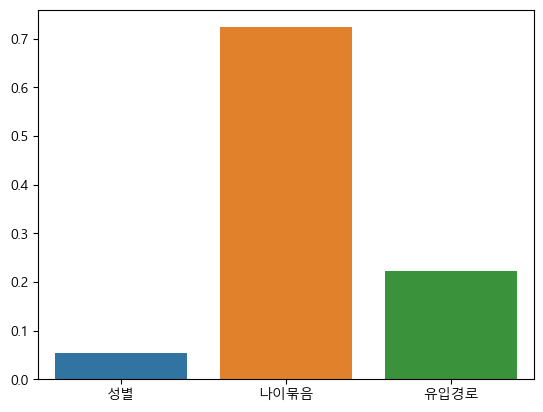

In [52]:
# 막대 그래프 설정
import seaborn as sns
importance = clf_rf.feature_importances_
sns.barplot(x = X.columns, y = importance)

In [53]:
# df1

# input, target data 설정

X = df1[['성별', '나이묶음', '유입경로']]
y = df1[['구매력']]

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

clf_rf = RandomForestClassifier(random_state=0, max_depth=5)
clf_rf.fit(X_tn_std, y_tn)

pred_rf = clf_rf.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_rf)

print('훈련', clf_rf.score(X_tn_std, y_tn)) 
print('테스트', clf_rf.score(X_te_std, y_te))

훈련 0.7854896675651393
테스트 0.7940251572327044


C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\1887128916.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_tn_std, y_tn)


<AxesSubplot:>

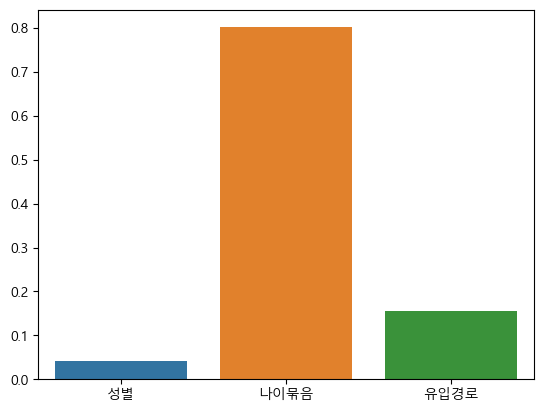

In [54]:
importance = clf_rf.feature_importances_
sns.barplot(x = X.columns, y = importance)

In [55]:
# df2

# input, target data 설정

X = df2[['성별', '연령대', '유입경로']]
y = df2[['구매력']]

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

clf_rf = RandomForestClassifier(random_state=0, max_depth=8)
clf_rf.fit(X_tn_std, y_tn)

pred_rf = clf_rf.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_rf)

print('훈련', clf_rf.score(X_tn_std, y_tn)) 
print('테스트', clf_rf.score(X_te_std, y_te))

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\179369455.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_tn_std, y_tn)


훈련 0.7857142857142857
테스트 0.7935010482180294


Text(0.5, 0, 'RandomForestClassifier')

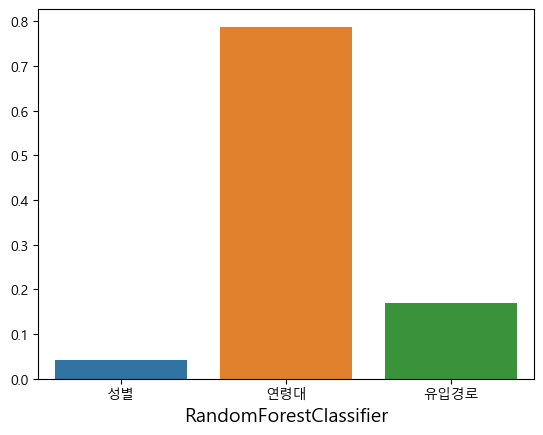

In [56]:
importance = clf_rf.feature_importances_
sns.barplot(x = X.columns, y = importance)
plt.xlabel('RandomForestClassifier', size = 14)

In [57]:
# df3

# input, target data 설정

X = df3[['성별', '나이묶음', '주소(동/읍/면)', '유입경로', '유입기기', '사업자구분']]
y = df3[['구매력']]

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

clf_rf = RandomForestClassifier(random_state=0, max_depth=5)
clf_rf.fit(X_tn_std, y_tn)

pred_rf = clf_rf.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_rf)

print('훈련', clf_rf.score(X_tn_std, y_tn)) 
print('테스트', clf_rf.score(X_te_std, y_te))

C:\Users\jhc74\AppData\Local\Temp\ipykernel_14516\2906010550.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_tn_std, y_tn)


훈련 0.8407457322551662
테스트 0.8333333333333334


<AxesSubplot:>

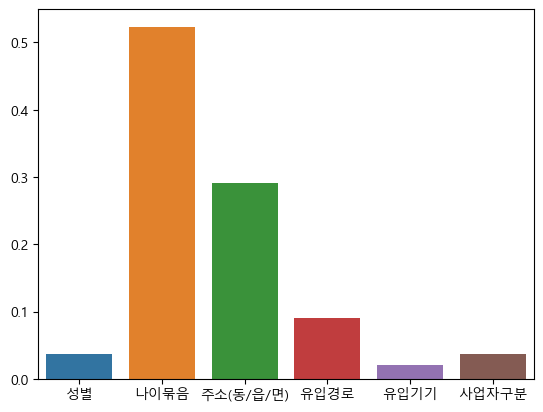

In [58]:
importance = clf_rf.feature_importances_
sns.barplot(x = X.columns, y = importance)

In [59]:
### gbrt

from sklearn.ensemble import GradientBoostingClassifier

X = df2[['성별', '연령대', '유입경로']]
y = df2[['구매력']]

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(X_tn_std, y_tn)

print('훈련', gbrt.score(X_tn_std, y_tn)) 
print('테스트', gbrt.score(X_te_std, y_te))

c:\Users\jhc74\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 0.7883254716981132
테스트 0.7877358490566038


Text(0.5, 0, 'GradientBoostingClassifier')

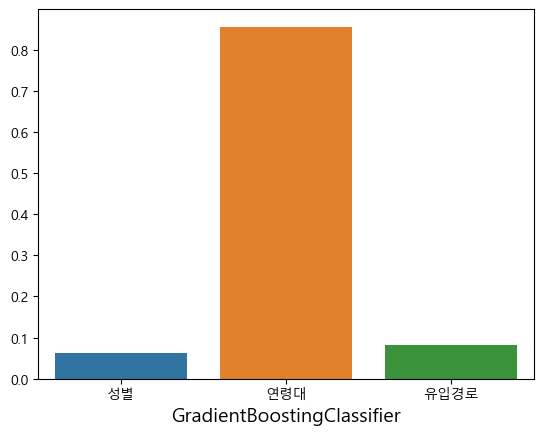

In [60]:
importance = gbrt.feature_importances_
sns.barplot(x = X.columns, y = importance)
plt.xlabel('GradientBoostingClassifier', size = 14)

In [61]:
### gbrt

from sklearn.ensemble import GradientBoostingClassifier

X = df3[['성별', '나이묶음', '주소(동/읍/면)', '유입경로']]
y = df3[['구매력']]

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=8)
gbrt.fit(X_tn_std, y_tn)

print('훈련', gbrt.score(X_tn_std, y_tn))
print('테스트', gbrt.score(X_te_std, y_te))

c:\Users\jhc74\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 0.8545597484276729
테스트 0.8309748427672956


<AxesSubplot:>

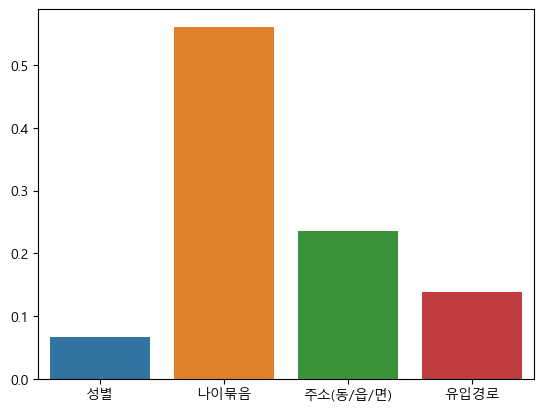

In [62]:
importance = gbrt.feature_importances_
sns.barplot(x = X.columns, y = importance)

### 다른 모델들의 정확도 확인

In [63]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_KNC = KNeighborsClassifier(3)
clf_SVC = SVC(kernel="rbf", C=0.025, probability=True)
clf_NuSVC = NuSVC(probability=True)
clf_DTC = DecisionTreeClassifier()
clf_RF = RandomForestClassifier()
clf_Ada = AdaBoostClassifier()
clf_GB = GradientBoostingClassifier()
clf_GNB = GaussianNB()
clf_LDA = LinearDiscriminantAnalysis()
clf_QDA = QuadraticDiscriminantAnalysis()

X = df2[['성별', '연령대', '유입경로']]
y = df2[['구매력']]

X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

std_Scale.fit(X_tn)
X_tn_std = std_Scale.transform(X_tn)
X_te_std = std_Scale.transform(X_te)

c:\Users\jhc74\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
Accuracy: 76.1006%


Text(0.5, 0, 'SVC')

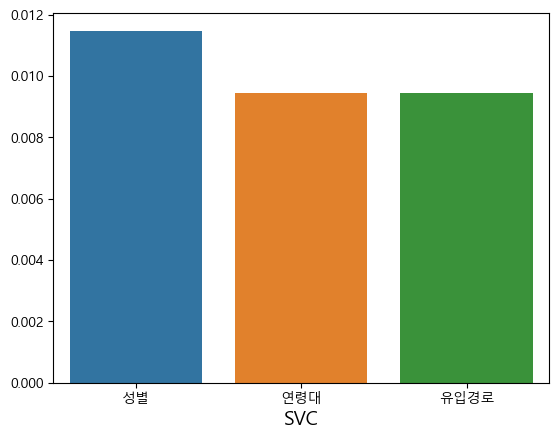

In [64]:
from sklearn.inspection import permutation_importance
import numpy as np

clf_SVC.fit(X_tn_std, y_tn)
name = clf_SVC.__class__.__name__

print(name)
train_predictions = clf_SVC.predict(X_te_std)
acc = accuracy_score(y_te, train_predictions)
print("Accuracy: {:.4%}".format(acc))

perm_importance = permutation_importance(clf_SVC, X_te_std, y_te)

feature_names = ['성별', '연령대', '유입경로']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
sns.barplot(x = [features[sorted_idx][2], features[sorted_idx][0], features[sorted_idx][1]], y = [perm_importance.importances_mean[sorted_idx][2], perm_importance.importances_mean[sorted_idx][0], perm_importance.importances_mean[sorted_idx][1]])
plt.xlabel(name, size = 14)

AdaBoostClassifier
Accuracy: 78.3019%


c:\Users\jhc74\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 0, 'AdaBoostClassifier')

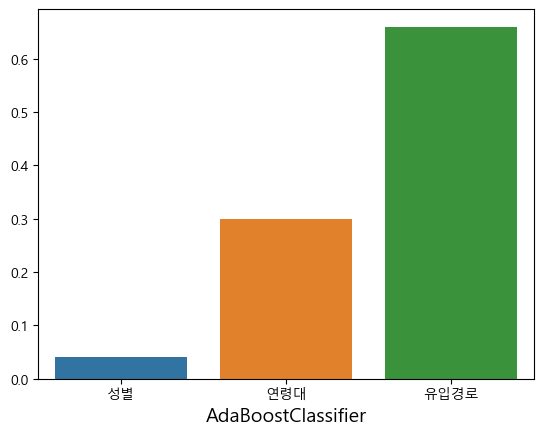

In [65]:
clf_Ada.fit(X_tn_std, y_tn)
name = clf_Ada.__class__.__name__

print(name)
train_predictions = clf_Ada.predict(X_te_std)
acc = accuracy_score(y_te, train_predictions)
print("Accuracy: {:.4%}".format(acc))

importance = clf_Ada.feature_importances_
sns.barplot(x = X.columns, y = importance)
plt.xlabel(name, size = 14)

[-0.00424528  0.04166667 -0.01981132]


c:\Users\jhc74\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

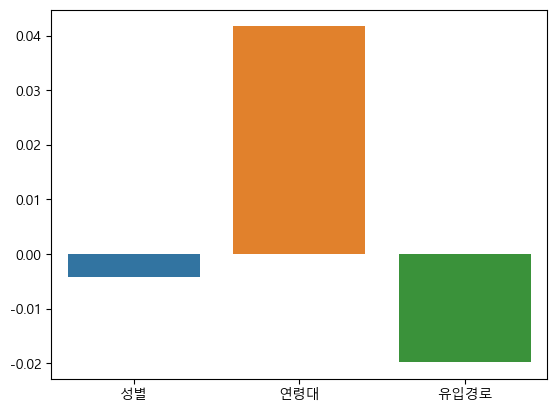

In [66]:
from sklearn.inspection import permutation_importance

clf_GNB.fit(X_tn_std, y_tn)

imps = permutation_importance(clf_GNB, X_te_std, y_te)
print(imps.importances_mean)
sns.barplot(x = ['성별', '연령대', '유입경로'], y = imps.importances_mean)